# PAP2: V223 Brownsche Bewegung

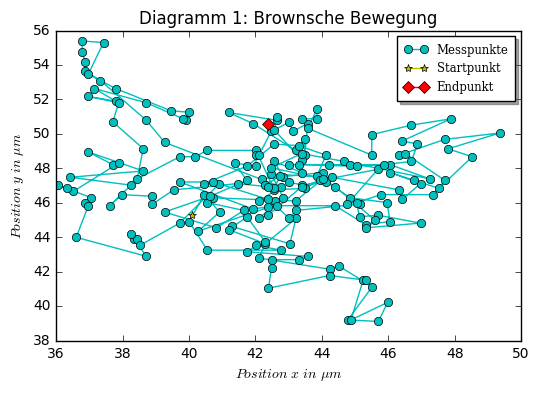

In [1]:
#Aufgabe 1: Graph Brwonsche Bewegung

#Module Importieren
%matplotlib inline
import matplotlib.pyplot as plt 
import matplotlib.mlab as mlab 
import numpy as np

#Funktion zum Einlesen der Komma
def comma_to_float(valstr):
    return float(valstr.decode("utf-8").replace(',','.'))

t,x,y=np.loadtxt('Messung.dat', skiprows=1, usecols=(1,2,3), converters= {1:comma_to_float, 2:comma_to_float, 3:comma_to_float}, unpack=True)

#Messpunkte plotten, Start und Ende hervorheben :D
plt.plot(x[1:-1], y[1:-1], marker='o', color='c', linewidth=1, label='Messpunkte')
plt.plot(x[0], y[0], marker='*', color='y', linewidth=1, label='Startpunkt')
plt.plot(x[-1:], y[-1:], marker='D', color='r', linewidth=1, label='Endpunkt')
plt.xlabel('$Position\ x\ in\ \mu m$')
plt.ylabel('$Position\ y\ in\ \mu m$')
plt.title('Diagramm 1: Brownsche Bewegung') 
plt.rcParams["figure.figsize"][0] = 8
plt.rcParams["figure.figsize"][1] = 5
plt.rcParams["font.family"]='serif'
plt.legend(borderpad=0.6, borderaxespad=0.5, loc='best', shadow='true', fontsize = 'small')

#plt.savefig('v223_1.pdf', format='PDF')

r_squared_mean=  1.90871713433
r_squared_mean_std=  0.147554686736
dt_mean=  1.00052736318


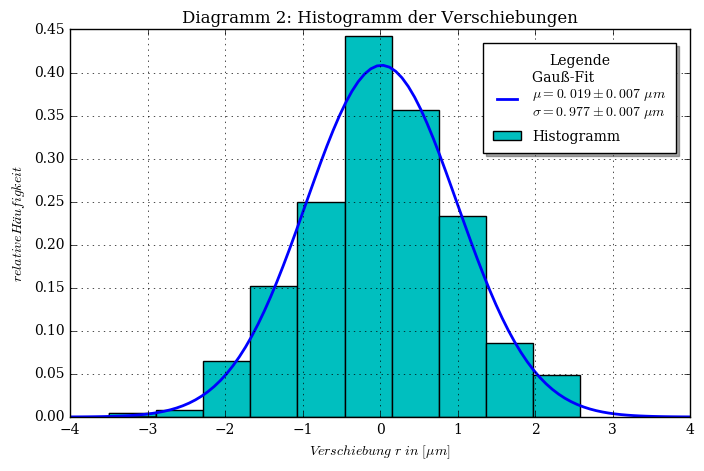

In [24]:
#Aufgabe 2: Berechnung des mittleren Verschiebungsquadrates

#Errechnen der relativen Verschiebung
dt=np.array([])
dx=np.array([])
dy=np.array([])

i = 0
while i < len(t)-1:
    dt=np.append(dt, t[i+1]-t[i])
    dx=np.append(dx, x[i+1]-x[i])
    dy=np.append(dy, y[i+1]-y[i])
    i = i + 1
    
r_squared=dx**2+dy**2

r_squared_mean=np.mean(r_squared)
print("r_squared_mean= ", r_squared_mean) 

r_squared_mean_std=np.std(r_squared)/np.sqrt(len(r_squared)) 
print("r_squared_mean_std= ", r_squared_mean_std) 

dt_mean=np.mean(dt)
print("dt_mean= ", dt_mean)

#Daten zusammenführen zu einem Array
all_data = np.append(dx, dy)
mu=np.mean(all_data)
sigma=np.std(all_data)
gauss = mlab.normpdf(np.linspace(-4,4,100), mu , sigma)

#Plotten: Histogramm und Gauß
plt.title('Diagramm 2: Histogramm der Verschiebungen')
plt.plot(np.linspace(-4,4,100), gauss, 'b-', linewidth=2, label='Gauß-Fit \n$\mu=%.3f\pm 0.007\ \mu m$ \n$\sigma=%.3f\pm 0.007\ \mu m$' %(mu, sigma)) 
plt.hist(all_data, normed=1, color='c', label = 'Histogramm')
plt.xlabel('$Verschiebung\ r\ in\ [\mu m]$')
plt.ylabel('$relative Häufigkeit$')
plt.grid(True)
plt.rcParams["figure.figsize"][0] = 8
plt.rcParams["figure.figsize"][1] = 5
plt.rcParams["font.family"]='serif'
plt.legend(title='Legende', borderpad=0.7, borderaxespad=1, loc='best', shadow='true', fontsize='medium')

#plt.savefig('v223_2.pdf', format='PDF')

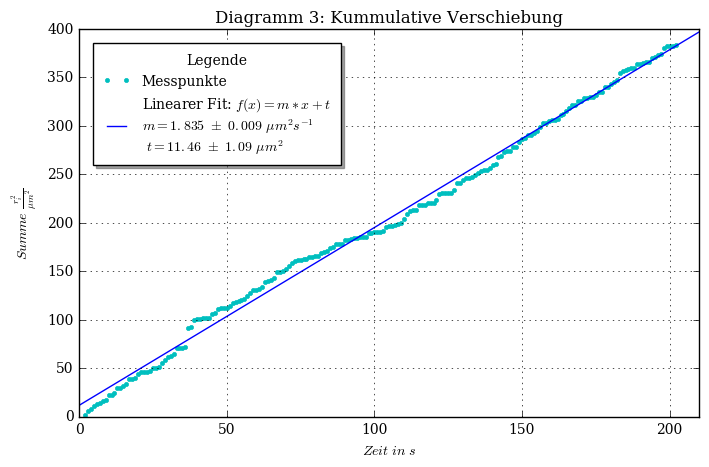

In [21]:
#Aufgabe 4: Kumulative Verschiebung

#Geradengleichung definieren für Fit
r_kumm=np.cumsum(r_squared)
from scipy.optimize import curve_fit 
def linear(x,a,b):
    return a*x+b
x = np.linspace(0,220,300)
popt, pcov = curve_fit(linear, t[:-1], r_kumm)
perr = np.sqrt(np.diag(pcov))

#Plotten der Werte des Fits
plt.plot(t[:-1], r_kumm, marker='.', color='c', linewidth=0, label='Messpunkte') 
plt.plot(x, linear(x,*popt), label='Linearer Fit: $f(x)=m*x+t$ \n$m=%.3f\ \pm\ %.3f\ \mu m^2 s^{-1}$ \n$ \ t=%.2f\ \pm\ %.2f\ \mu m^2$' %(popt[0], perr[0], popt[1], perr[1]))
plt.xlabel('$Zeit\ in\ s$')
plt.ylabel('$Summe\ \\frac{r_i^2}{\mu m^2}$')
plt.title('Diagramm 3: Kummulative Verschiebung') 
plt.grid(True)
plt.rcParams["figure.figsize"][0] = 8
plt.rcParams["figure.figsize"][1] = 5
plt.rcParams["font.family"]='serif'
plt.legend(title='Legende', borderpad=0.7, borderaxespad=1, loc='best', shadow='true', fontsize='medium')
plt.axis((0,210,0,400))

#plt.savefig('v223_3.pdf', format='PDF')